# Customer Segmentation Analysis - Data Preparation

# Part 1 - Importing and processing databases

In [1]:
#packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy as sa
import mysql.connector as mysql 

## Database 1: Customer Data

is a data set associating customers' unique identifiers with a set of traits: "Profile" and "Segment".  The data set relates Customer ID to Segment ID and Profile ID.  There are no duplicates.


In [2]:
customers = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 1)

In [6]:
customers.head()

ID  ProfileID  SegmentID
0   5        4.0          1
1  10        NaN          1
2  19        NaN          1
3  22        6.0          1
4  23        3.0          1

In [94]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         110000 non-null  int64  
 1   ProfileID  65946 non-null   float64
 2   SegmentID  110000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 MB


In [10]:
customers.nunique()

ID           110000
ProfileID         6
SegmentID         5
dtype: int64

## Database 2: Sales Data

is a data set recording sales following the promotion to customers' unique identifiers.  There are no duplicates.  The data set is not comprehensive (meaning no records exist for non-shoppers).

In [3]:
sales = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 2)

In [12]:
sales.head()

ID   Spend
0   171  126.59
1   476  100.77
2  1037  -48.83
3  1959  170.53
4  2037   66.03

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8234 non-null   int64  
 1   Spend   8234 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 128.8 KB


## Database 3: Versions Data

is a data set identifying which promotional materials were sent to each uniquely identified customer.  The data set also contains a "Mail" indicator, values of "1" indicate that a customer received a communcation, while no value indicates that the customer was not contacted (i.e. that the customer was in the "Control" group).  There are no duplicates.

In [4]:
versions = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 3)

In [248]:
versions

ID Version  MailInd
0       61594       A      1.0
1       31464       A      1.0
2       49794       B      1.0
3       90236       B      1.0
4       55758       B      1.0
...       ...     ...      ...
109995  37171       A      NaN
109996  42328       A      NaN
109997  64039       B      NaN
109998   5204       A      NaN
109999  22614       A      NaN

[110000 rows x 3 columns]

In [5]:
versions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       110000 non-null  int64  
 1   Version  110000 non-null  object 
 2   MailInd  100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [18]:
versions.nunique()

ID         110000
Version         2
MailInd         1
dtype: int64

## Database 4: Departments Data

is a data set recording sales by year for a retailer's departments over 2 years.  Sales and customer counts are aggregated to Department, Year, Segment, and Profile.  There are no duplicates.

In [6]:
depts = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 4)

In [20]:
depts.head()

DepartmentID  Year  SegmentID  ProfileID    Sales  Customers
0            A  1999          1        NaN  1989.77        347
1            A  1999          1        1.0  6270.30        616
2            A  1999          1        2.0  7131.06        657
3            A  1999          1        3.0  7293.91        665
4            A  1999          1        4.0  1995.79        348

In [21]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DepartmentID  700 non-null    object 
 1   Year          700 non-null    int64  
 2   SegmentID     700 non-null    int64  
 3   ProfileID     600 non-null    float64
 4   Sales         700 non-null    float64
 5   Customers     700 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 32.9+ KB


## Exporting data to CSV files

Exporting data so we can easily access them if we want

In [22]:
customers.to_csv('customers.csv',index=False) 

In [23]:
sales.to_csv('sales.csv',index=False) 

In [24]:
versions.to_csv('versions.csv',index=False) 

In [25]:
depts.to_csv('depts.csv',index=False) 

# Part 2 - Upload to MySQL
Uploading to MySQL so it will be easier to manipulate and work with all databases

## Connecting to MySQL

In [44]:
my_password = ''  #I have to write my password if I want to connect again

In [239]:
conn = mysql.connector.connect(
        host='localhost',
        user='vieiralaura',
        password=my_password,
        auth_plugin='mysql_native_password',
        database='customer') 

## Creating SQL Tables

# Customer 

In [225]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS customers")

#Creating table customers
sql_customers ='''CREATE TABLE customers(
 ID INT,
 ProfileID VARCHAR(5),
 SegmentID INT
)'''

cursor.execute(sql_customers)

In [236]:
# Convert DataFrame to a list of tuples
customers_tuples = [tuple(row) for row in customers_none.itertuples(index=False, name=None)]

try:
    conn = mysql.connector.connect(
        host='localhost',
        user='vieiralaura',
        password=my_password,
        auth_plugin='mysql_native_password',
        database='customer'
    )

    cursor = conn.cursor()

    for row in customers_tuples:
        # Use 'None' for NULL values
        row = tuple(None if pd.isna(value) else value for value in row)
        sql = f"INSERT INTO customers (ID, ProfileID, SegmentID) VALUES {row}"
        cursor.execute(sql)
        print("Record inserted")

    conn.commit()  # Commit changes to the database

except mysql.connector.Error as e:
    print("Error: {}".format(e))

finally:
    if conn.is_connected():
        cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

# Departments

In [240]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS depts")

#Creating table depts
sql_depts ='''CREATE TABLE depts(
 DepartmentID VARCHAR(1),
 Year INT,
 SegmentID INT,
 ProfileID VARCHAR(5),
 Sales FLOAT,
 Customers INT
)'''

cursor.execute(sql_depts)

In [271]:
depts

DepartmentID  Year  SegmentID  ProfileID     Sales  Customers
0              A  1999          1        NaN   1989.77        347
1              A  1999          1        1.0   6270.30        616
2              A  1999          1        2.0   7131.06        657
3              A  1999          1        3.0   7293.91        665
4              A  1999          1        4.0   1995.79        348
..           ...   ...        ...        ...       ...        ...
695            J  2000          5        2.0  20734.48       3380
696            J  2000          5        3.0  31718.52       4181
697            J  2000          5        4.0     39.53        148
698            J  2000          5        5.0     48.21        163
699            J  2000          5        6.0    240.83        364

[700 rows x 6 columns]

In [243]:
depts_none = depts.where(pd.notna(depts),'None')
depts_none

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DepartmentID  700 non-null    object
 1   Year          700 non-null    int64 
 2   SegmentID     700 non-null    int64 
 3   ProfileID     700 non-null    object
 4   Sales         700 non-null    object
 5   Customers     700 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 32.9+ KB


In [244]:
# Convert DataFrame to a list of tuples
depts_tuples = [tuple(row) for row in depts_none.itertuples(index=False, name=None)]

try:
    conn = mysql.connector.connect(
        host='localhost',
        user='vieiralaura',
        password=my_password,
        auth_plugin='mysql_native_password',
        database='customer'
    )

    cursor = conn.cursor()

    for row in depts_tuples:
        # Use 'None' for NULL values
        row = tuple(None if pd.isna(value) else value for value in row)
        sql = f"INSERT INTO depts (DepartmentID, Year, SegmentID, ProfileID, Sales, Customers) VALUES {row}"
        cursor.execute(sql)
        print("Record inserted")

    conn.commit()  # Commit changes to the database

except mysql.connector.Error as e:
    print("Error: {}".format(e))

finally:
    if conn.is_connected():
        cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

In [275]:
cursor = conn.cursor()

 # Step 1: Update the Values to Set 'ProfileID' to NULL
update_query = "UPDATE depts SET ProfileID = NULL WHERE ProfileID = 'None'"
cursor.execute(update_query)

 # Step 2: Alter the Table to Change the Data Type
alter_query = "ALTER TABLE depts MODIFY COLUMN ProfileID INT"
cursor.execute(alter_query)

conn.commit()  # Commit changes to the database

cursor.close()

True

# Versions

In [263]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS versions")

#Creating table versions
sql_versions ='''CREATE TABLE versions(
ID INT,
Version VARCHAR(1),
MailInd VARCHAR(5)
)'''

cursor.execute(sql_versions)

In [256]:
versions_none = versions.where(pd.notna(versions),'None')
versions_none

ID Version MailInd
0       61594       A     1.0
1       31464       A     1.0
2       49794       B     1.0
3       90236       B     1.0
4       55758       B     1.0
...       ...     ...     ...
109995  37171       A    None
109996  42328       A    None
109997  64039       B    None
109998   5204       A    None
109999  22614       A    None

[110000 rows x 3 columns]

In [262]:
versions_none.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ID       110000 non-null  int64 
 1   Version  110000 non-null  object
 2   MailInd  110000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [264]:
# Convert DataFrame to a list of tuples
versions_tuples = [tuple(row) for row in versions_none.itertuples(index=False, name=None)]

try:
    conn = mysql.connector.connect(
        host='localhost',
        user='vieiralaura',
        password=my_password,
        auth_plugin='mysql_native_password',
        database='customer'
    )

    cursor = conn.cursor()

    for row in versions_tuples:
        # Use 'None' for NULL values
        row = tuple(None if pd.isna(value) else value for value in row)
        sql = f"INSERT INTO versions (ID, Version, MailInD) VALUES {row}"
        cursor.execute(sql)
        print("Record inserted")

    conn.commit()  # Commit changes to the database

except mysql.connector.Error as e:
    print("Error: {}".format(e))

finally:
    if conn.is_connected():
        cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

In [276]:
versions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       110000 non-null  int64  
 1   Version  110000 non-null  object 
 2   MailInd  100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [282]:
cursor = conn.cursor()

 # Step 1: Update the Values to Set 'laura' to NULL
update_query = "UPDATE versions SET MailInd = NULL WHERE MailInd = 'None'"
cursor.execute(update_query)

 # Step 2: Alter the Table to Change the Data Type
alter_query = "ALTER TABLE versions MODIFY COLUMN MailInd INT"
cursor.execute(alter_query)

conn.commit()  # Commit changes to the database

cursor.close()


True

# Sales

In [246]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")

#Creating table sales
sql_sales ='''CREATE TABLE sales(
    ID INT,
    Spend FLOAT
)'''

cursor.execute(sql_sales)

In [254]:
# Convert DataFrame to a list of tuples
sales_tuples = [tuple(row) for row in sales.itertuples(index=False, name=None)]

try:
    conn = mysql.connector.connect(
        host='localhost',
        user='vieiralaura',
        password=my_password,
        auth_plugin='mysql_native_password',
        database='customer'
    )

    cursor = conn.cursor()

    for row in sales_tuples:
        # Use 'None' for NULL values

        sql = f"INSERT INTO sales (ID, Spend) VALUES {row}"
        cursor.execute(sql)
        print("Record inserted")

    conn.commit()  # Commit changes to the database

except mysql.connector.Error as e:
    print("Error: {}".format(e))

finally:
    if conn.is_connected():
        cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

In [277]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8234 non-null   int64  
 1   Spend   8234 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 128.8 KB


# Info Tables

Supplemental datasets are also included to provide explanatory info for customer traits ("segments" and "profiles"), departments, and communication versions.

In [313]:
info_segments = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 5)
info_profiles = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 6)
info_departments = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 7)
info_versions = pd.read_excel('customer_segmentation_data.xlsx', sheet_name = 8)

In [307]:
#info_segments
table_name = 'info_segments'
table_columns_and_types = 'SegmentID PRIMARY KEY, Segment_Description VARCHAR(50)'
table_columns = 'SegmentID, Segment_Description'

cursor = conn.cursor()

cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

#Creating table
sql_create =f"CREATE TABLE {table_name} ({table_columns_and_types})"

cursor.execute(sql_create)

tuples = [tuple(row) for row in locals()[table_name].itertuples(index=False, name=None)]

for row in tuples:
    sql_insert = f"INSERT INTO {table_name} ({table_columns}) VALUES {row}"
    cursor.execute(sql_insert)
    print("Record inserted")

    conn.commit()  # Commit changes to the database

cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


True

In [317]:
#info_profiles
table_name = 'info_profiles'
table_columns_and_types = 'ProfileID INT PRIMARY KEY, Profile_Description VARCHAR(50)'
table_columns = 'ProfileID, Profile_Description'

cursor = conn.cursor()

cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

#Creating table
sql_create =f"CREATE TABLE {table_name} ({table_columns_and_types})"

cursor.execute(sql_create)

tuples = [tuple(row) for row in locals()[table_name].itertuples(index=False, name=None)]

for row in tuples:
    sql_insert = f"INSERT INTO {table_name} ({table_columns}) VALUES {row}"
    cursor.execute(sql_insert)
    print("Record inserted")

    conn.commit()  # Commit changes to the database

cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


True

In [321]:
#info_departments
table_name = 'info_departments'
table_columns_and_types = 'DepartmentID VARCHAR(1) PRIMARY KEY, Department_Description VARCHAR(50)'
table_columns = 'DepartmentID, Department_Description'

cursor = conn.cursor()

cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

#Creating table 
sql_create =f"CREATE TABLE {table_name} ({table_columns_and_types})"

cursor.execute(sql_create)

tuples = [tuple(row) for row in locals()[table_name].itertuples(index=False, name=None)]

for row in tuples:
    sql_insert = f"INSERT INTO {table_name} ({table_columns}) VALUES {row}"
    cursor.execute(sql_insert)
    print("Record inserted")

    conn.commit()  # Commit changes to the database

cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


True

In [325]:
#Setting table informations - just need to change this part
table_name = 'info_versions'
table_columns_and_types = 'Version VARCHAR(1) PRIMARY KEY, Version_Description VARCHAR(10)'
table_columns = 'Version, Version_Description'

############################ don't change code from here
cursor = conn.cursor()

#Creating table 
cursor.execute(f"DROP TABLE IF EXISTS {table_name}")
sql_create =f"CREATE TABLE {table_name} ({table_columns_and_types})"
cursor.execute(sql_create)

#Inserting table
tuples = [tuple(row) for row in locals()[table_name].itertuples(index=False, name=None)]

for row in tuples:
    sql_insert = f"INSERT INTO {table_name} ({table_columns}) VALUES {row}"
    cursor.execute(sql_insert)
    print("Record inserted")

    conn.commit()  # Commit changes to the database

cursor.close()

Record inserted
Record inserted


True

# Relational database design

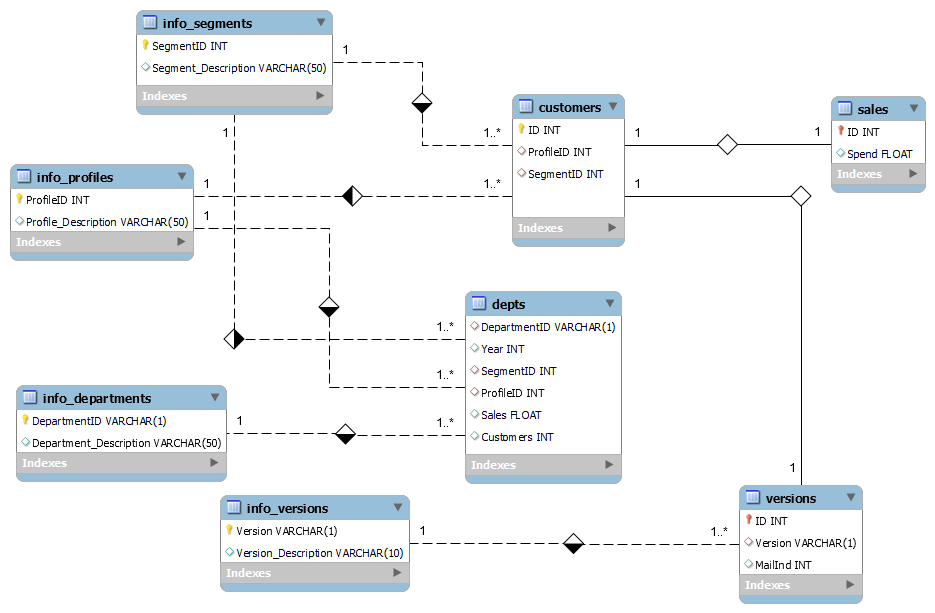